In [1]:
import pandas as pd

In [2]:
full_movie_df = pd.read_csv('./data/full_movie_df_3rd.csv')

full_movie_df.set_index('movie_title', inplace=True)

In [5]:
del full_movie_df['Unnamed: 0']

### STEP 1)  Insure all numerical features are appropriate data type

In [6]:
full_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10139 entries, Avatar to Queen Bees
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   link_stub        10139 non-null  object 
 1   worldwide_gross  10139 non-null  int64  
 2   rating           10139 non-null  object 
 3   budget           6195 non-null   float64
 4   runtime          9942 non-null   float64
 5   release_date     10139 non-null  object 
 6   distributor      8640 non-null   object 
 7   genres           10138 non-null  object 
 8   director         10092 non-null  object 
 9   writer           9996 non-null   object 
 10  producer         9851 non-null   object 
 11  lead_actor_1     10110 non-null  object 
 12  lead_actor_2     10089 non-null  object 
 13  actor_3          10094 non-null  object 
 14  imdb_score       10139 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 1.2+ MB


In [7]:
#The following columns are in need of conversion:
#[domestic gross, release date]

full_movie_df['worldwide_gross'] = full_movie_df['worldwide_gross'].astype(float)
full_movie_df['release_date'] = pd.to_datetime(full_movie_df['release_date'])

In [8]:
full_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10139 entries, Avatar to Queen Bees
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   link_stub        10139 non-null  object        
 1   worldwide_gross  10139 non-null  float64       
 2   rating           10139 non-null  object        
 3   budget           6195 non-null   float64       
 4   runtime          9942 non-null   float64       
 5   release_date     10139 non-null  datetime64[ns]
 6   distributor      8640 non-null   object        
 7   genres           10138 non-null  object        
 8   director         10092 non-null  object        
 9   writer           9996 non-null   object        
 10  producer         9851 non-null   object        
 11  lead_actor_1     10110 non-null  object        
 12  lead_actor_2     10089 non-null  object        
 13  actor_3          10094 non-null  object        
 14  imdb_score       10139 non-null  

### Step 2) Insure no duplicates

In [9]:
full_movie_df.groupby('link_stub')['worldwide_gross']\
            .count().reset_index()\
            .reset_index()\
            .sort_values('worldwide_gross', ascending=False).head()

,index,link_stub,worldwide_gross
0,0,/title/tt0032138/?ref_=bo_cso_table_115,1
6762,6762,/title/tt1298649/?ref_=bo_cso_table_100,1
6755,6755,/title/tt1292703/?ref_=bo_cso_table_83,1
6756,6756,/title/tt1293847/?ref_=bo_cso_table_14,1
6757,6757,/title/tt1294213/?ref_=bo_cso_table_119,1


### Step 3) Missing Values

###### Still significant number of missing budget info from foreign, independent and old movies

#### Will try one regression iteration with dropping all rows and another by using median

In [10]:


full_movie_df.dropna(inplace=True)

In [12]:
full_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Avatar to Rich Kids
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   link_stub        5782 non-null   object        
 1   worldwide_gross  5782 non-null   float64       
 2   rating           5782 non-null   object        
 3   budget           5782 non-null   float64       
 4   runtime          5782 non-null   float64       
 5   release_date     5782 non-null   datetime64[ns]
 6   distributor      5782 non-null   object        
 7   genres           5782 non-null   object        
 8   director         5782 non-null   object        
 9   writer           5782 non-null   object        
 10  producer         5782 non-null   object        
 11  lead_actor_1     5782 non-null   object        
 12  lead_actor_2     5782 non-null   object        
 13  actor_3          5782 non-null   object        
 14  imdb_score       5782 non-null   fl

### Step 4) Identify Outliers

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [14]:
full_movie_df.describe()

,worldwide_gross,budget,runtime,imdb_score
count,5.782000e+03,5.782000e+03,5782.000000,5782.000000
mean,9.984865e+07,3.497731e+07,108.647873,6.371792
std,1.821268e+08,4.061162e+07,18.769135,0.997722
min,1.856122e+06,1.800000e+01,63.000000,1.400000
25%,1.208516e+07,1.000000e+07,96.000000,5.800000
50%,3.598754e+07,2.000000e+07,105.000000,6.400000
75%,1.050140e+08,4.200000e+07,118.000000,7.100000
max,2.847246e+09,3.560000e+08,271.000000,9.300000


/Users/rahulraju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='worldwide_gross'>

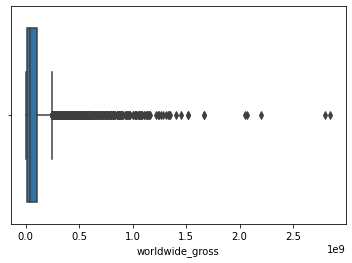

In [15]:
# 1) worldwide gross - lots of outliers as expected, will determine...
#... what to do as we go through each iteration of the regression

sns.boxplot(full_movie_df['worldwide_gross'])


/Users/rahulraju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='budget'>

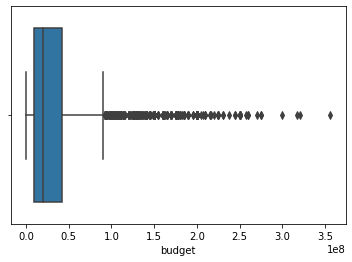

In [16]:
# 2) budget - a few outliers as expected, will determine...
#... what to do as we go through each iteration of the regression

sns.boxplot(full_movie_df['budget'])

/Users/rahulraju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime'>

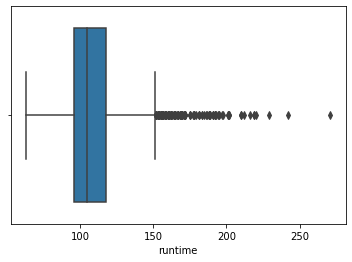

In [17]:
# 3) runtime - a few outliers as expected, will determine...
#... what to do as we go through each iteration of the regression
sns.boxplot(full_movie_df['runtime'])

/Users/rahulraju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='imdb_score'>

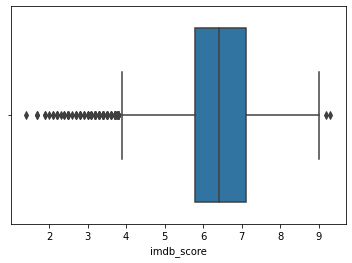

In [18]:
## ) imdb_score - a few outliers as expected, will determine...
#... what to do as we go through each iteration of the regression
sns.boxplot(full_movie_df['imdb_score'])

In [22]:

full_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Avatar to Rich Kids
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   link_stub        5782 non-null   object        
 1   worldwide_gross  5782 non-null   float64       
 2   rating           5782 non-null   object        
 3   budget           5782 non-null   float64       
 4   runtime          5782 non-null   float64       
 5   release_date     5782 non-null   datetime64[ns]
 6   distributor      5782 non-null   object        
 7   genres           5782 non-null   object        
 8   director         5782 non-null   object        
 9   writer           5782 non-null   object        
 10  producer         5782 non-null   object        
 11  lead_actor_1     5782 non-null   object        
 12  lead_actor_2     5782 non-null   object        
 13  actor_3          5782 non-null   object        
 14  imdb_score       5782 non-null   fl

/Users/rahulraju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='worldwide_gross', ylabel='Density'>

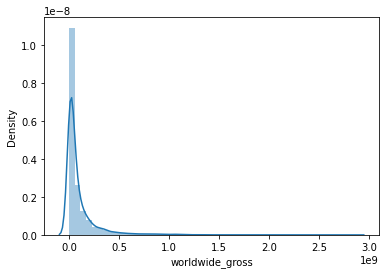

In [24]:
sns.distplot(full_movie_df['worldwide_gross'])

In [21]:
# We have our cleaned data frame(so far):  "cleaned_movie_df"

full_movie_df.to_csv('./data/cleaned_movie_df_3rd.csv')